# Import Dependencies for multiple linear regression Analysis and Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, Ridge

# Box and Histogram plot function

In [2]:
def box_hist(data): 
    fig, axs= plt.subplots(1,2,figsize=(12,3))

    sns.boxplot(data, ax=axs[0])
    axs[0].set_title('Boxplot')

    sns.histplot(data, ax=axs[1],kde=True)
    axs[1].set_title('Histogram')

    plt.tight_layout()
    return plt.show()

# Load and Preview the Dataset

In [3]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')
data.head(3)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165


Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax: 

Price: Offer Price in EUROs


# EDA

# Understand the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
data = data.rename(columns={'Age_08_04':'Age'})

In [6]:
data['Automatic'].value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

# Optimizing Data Types for Memory Efficiency

In [7]:
data['Age'] = data['Age'].astype('int16')
data['HP'] = data['HP'].astype('int16')
data['Doors'] = data['Doors'].astype('int8')
data['Cylinders'] = data['Cylinders'].astype('int8')
data['Gears'] = data['Gears'].astype('int8')
data['cc'] = data['cc'].astype('int16')
data['Weight'] = data['Weight'].astype('int16')
data['Automatic'] = data['Automatic'].astype('int8')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int16 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int16 
 5   Automatic  1436 non-null   int8  
 6   cc         1436 non-null   int16 
 7   Doors      1436 non-null   int8  
 8   Cylinders  1436 non-null   int8  
 9   Gears      1436 non-null   int8  
 10  Weight     1436 non-null   int16 
dtypes: int16(4), int64(2), int8(4), object(1)
memory usage: 50.6+ KB


In [9]:
data.head(3)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165


In [10]:
data['Cylinders'].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

# Remove column Which Contain Unique Values

In [11]:
data.drop(columns='Cylinders',inplace=True)

In [12]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [13]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,6.000000,1615.00000


# Target Column

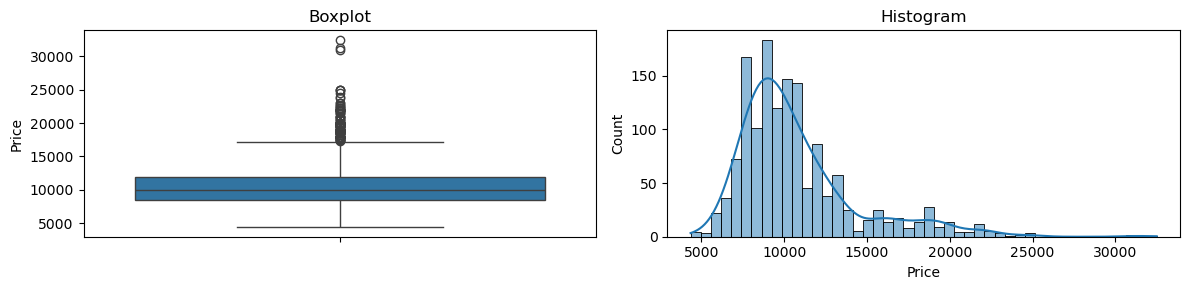

In [14]:
box_hist(data['Price'])

In [15]:
data['Price'] = np.log(data['Price'])

Applying a logarithmic transformation to the 'Price' column can help address skewness and make the data more normally distributed.

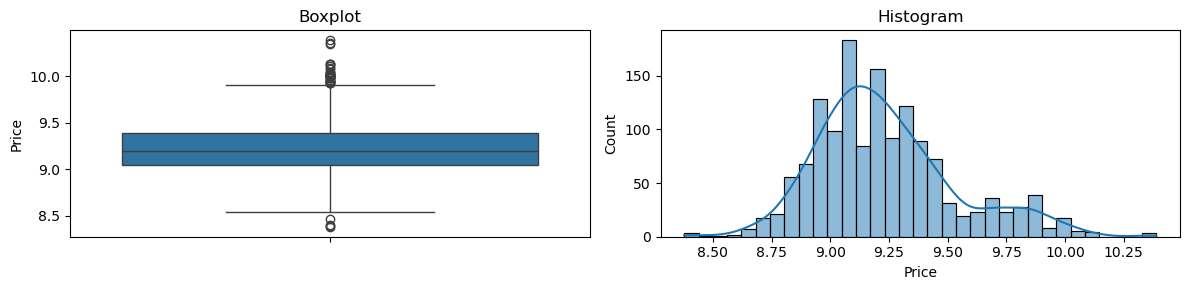

In [16]:
box_hist(data['Price'])

# Age Column

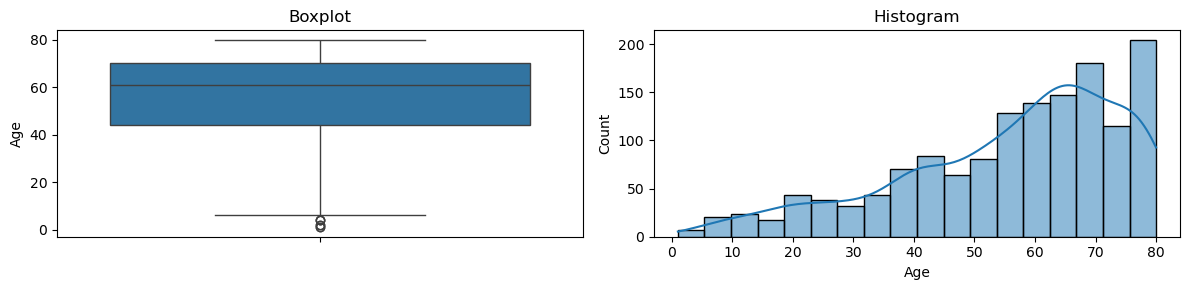

In [17]:
box_hist(data['Age'])

In [18]:
data['Age'] = np.power(data['Age'],2)

Applying a power transformation to the 'Age' column can help address skewness and make the data more normally distributed.

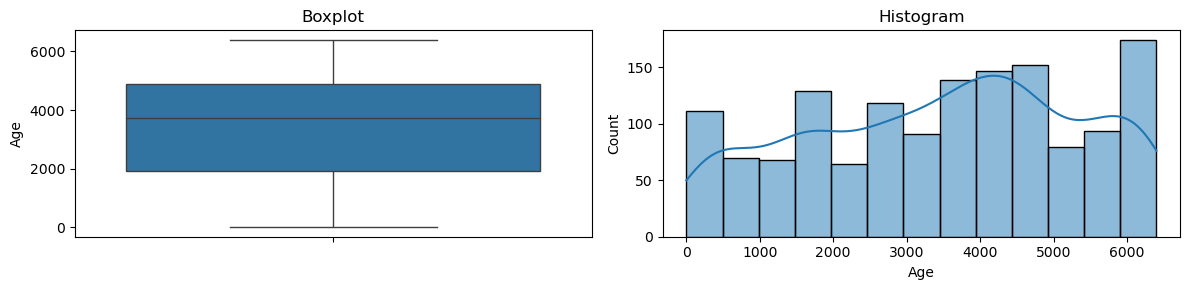

In [19]:
box_hist(data['Age'])

# KM column

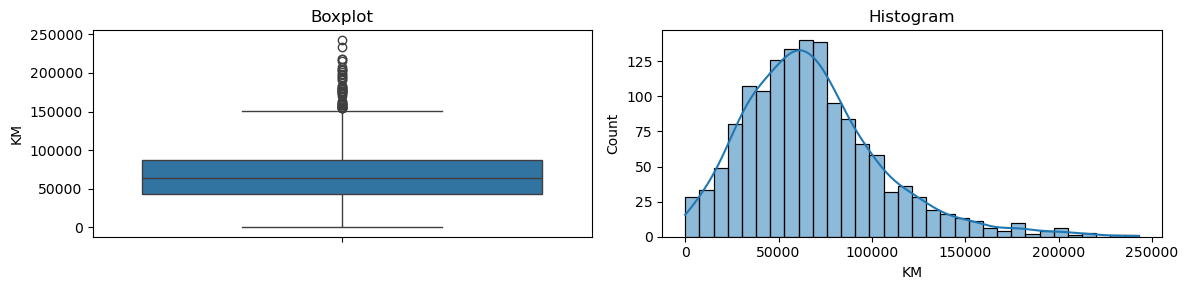

In [20]:
box_hist(data['KM'])

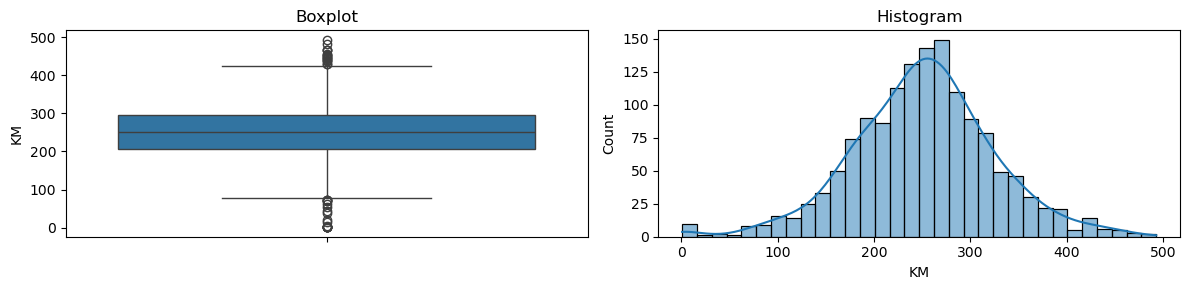

In [21]:
box_hist(np.sqrt(data['KM']))

In [22]:
data['KM'] = np.sqrt(data['KM'])

To apply a square root transformation to the 'KM' column  can help address skewness and make the data more normally distributed.

# HP Column

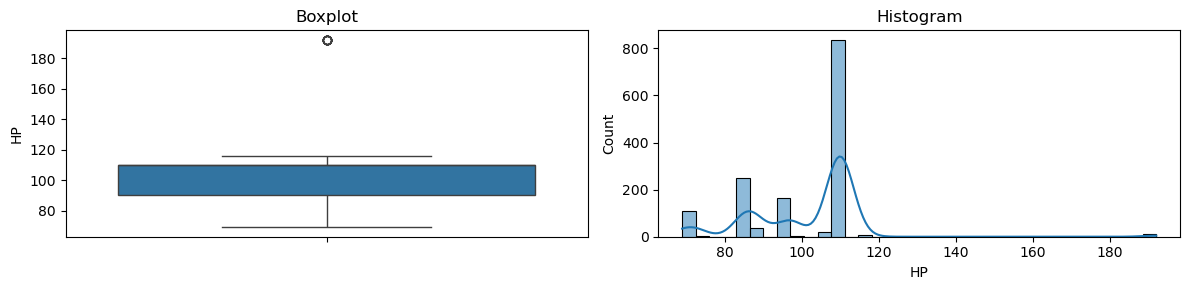

In [23]:
box_hist(data['HP'])

In [24]:
data['HP'].value_counts()

HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: count, dtype: int64

This is A kind of categorical column 

# CC column

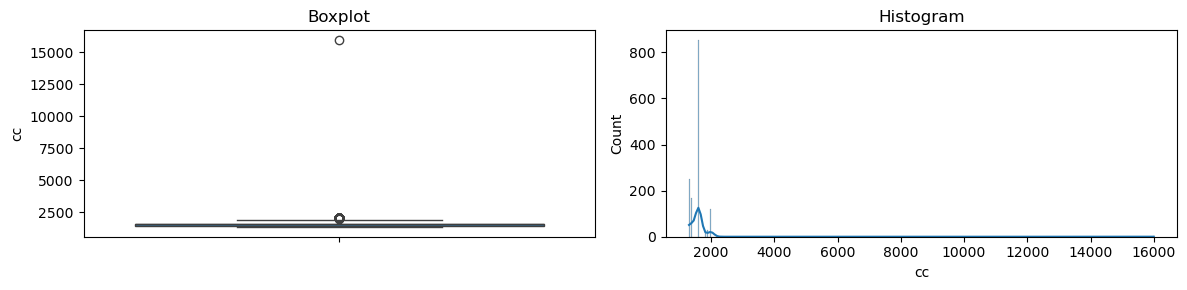

In [25]:
box_hist(data['cc'])

In [26]:
data['cc'].value_counts()

cc
1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: count, dtype: int64

In [27]:
data['cc'] = data['cc'].replace(16000, 1600)

Reduce the outlier . considering entry is wrong

# Weight

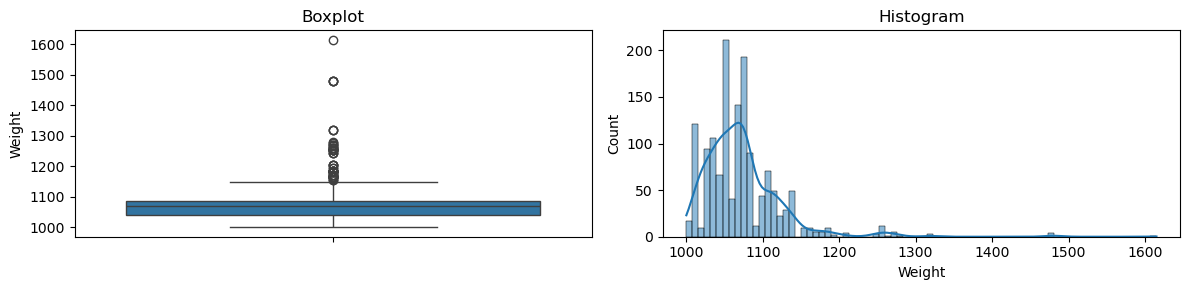

In [28]:
box_hist(data['Weight'])

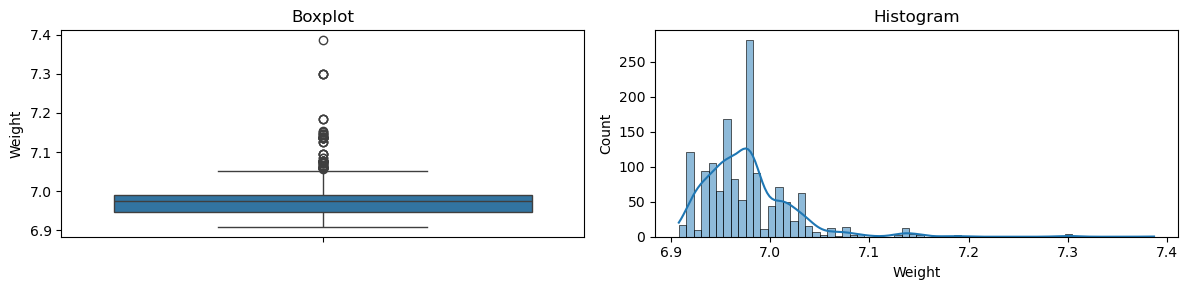

In [29]:
box_hist(np.log(data['Weight']))

In [30]:
data['Weight'] = np.log(data['Weight'])

Applying a logarithmic transformation to the 'Weight' column can help address skewness and make the data more normally distributed.

# Visualizations and Insights

In [31]:
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,9.510445,529,216.762543,Diesel,90,0,2000,3,5,7.060476
1,9.528794,529,270.068510,Diesel,90,0,2000,3,5,7.060476
2,9.543235,576,204.232710,Diesel,90,0,2000,3,5,7.060476
3,9.612467,676,219.089023,Diesel,90,0,2000,3,5,7.060476
4,9.528794,900,196.214169,Diesel,90,0,2000,3,5,7.064759


In [59]:
data.corr()

,Price,Age,KM,Fuel_Type,HP,cc,Weight
Price,1.000000,-0.839546,-0.646294,0.041954,0.313163,0.114062,0.516142
Age,-0.839546,1.000000,0.533806,0.072131,-0.140928,-0.117626,-0.433073
KM,-0.646294,0.533806,1.000000,-0.367719,-0.295840,0.261867,-0.069553
Fuel_Type,0.041954,0.072131,-0.367719,1.000000,0.417366,-0.643733,-0.542472
HP,0.313163,-0.140928,-0.295840,0.417366,1.000000,0.045452,0.093016
cc,0.114062,-0.117626,0.261867,-0.643733,0.045452,1.000000,0.723123
Weight,0.516142,-0.433073,-0.069553,-0.542472,0.093016,0.723123,1.000000


The correlation matrix shows the relationships between variables in the dataset. For instance, 'Price' is strongly negatively correlated with 'Age' and 'KM,' but positively with 'Weight.' 'Fuel_Type' shows a moderate positive correlation with 'HP,' while 'cc' and 'Weight' are highly positively correlated. This analysis helps in understanding feature dependencies.

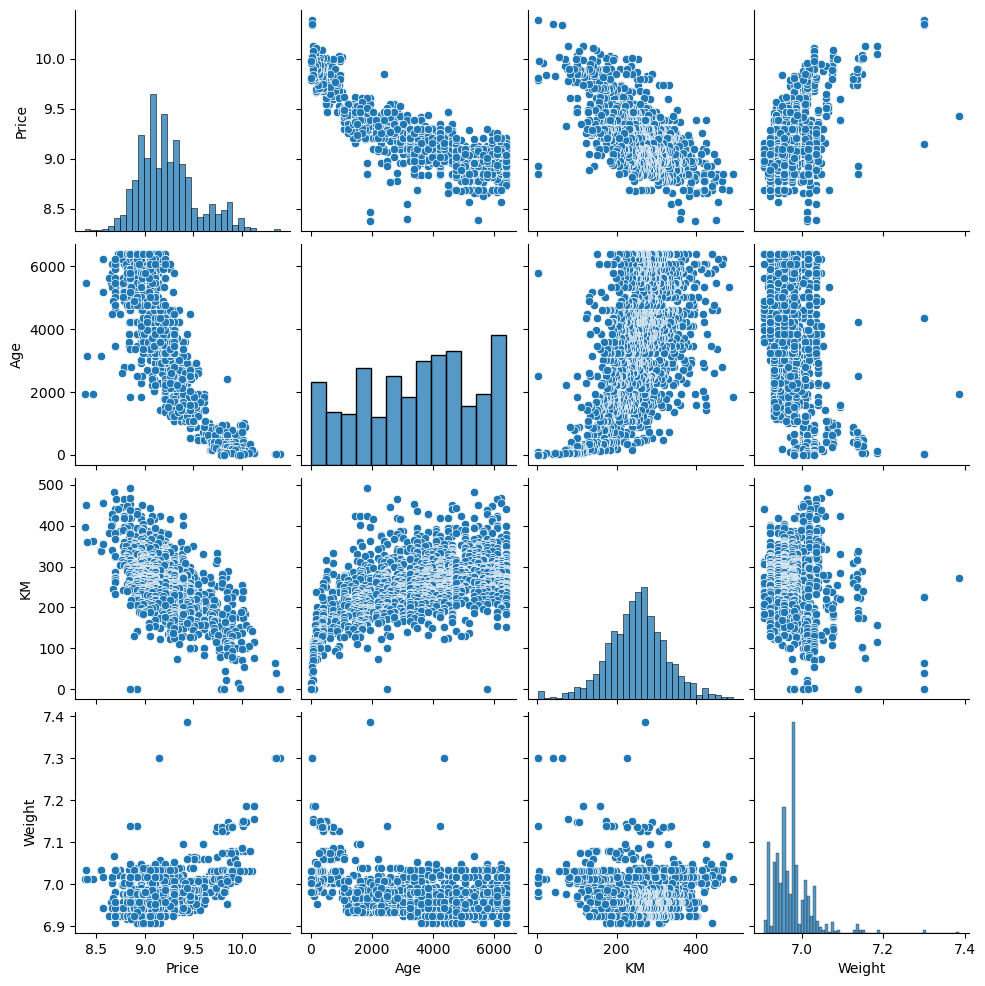

In [32]:
sns.pairplot(data.drop(columns=['Fuel_Type','Automatic','Doors','Gears','cc','HP']))

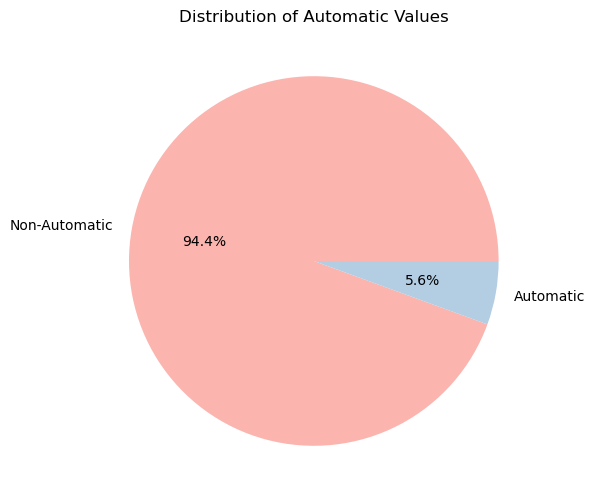

In [33]:
plt.figure(figsize=(8, 6))
plt.pie(data['Automatic'].value_counts(), labels=['Non-Automatic', 'Automatic'], autopct='%1.1f%%', colors=plt.get_cmap('Pastel1').colors)
plt.title('Distribution of Automatic Values')
plt.show()

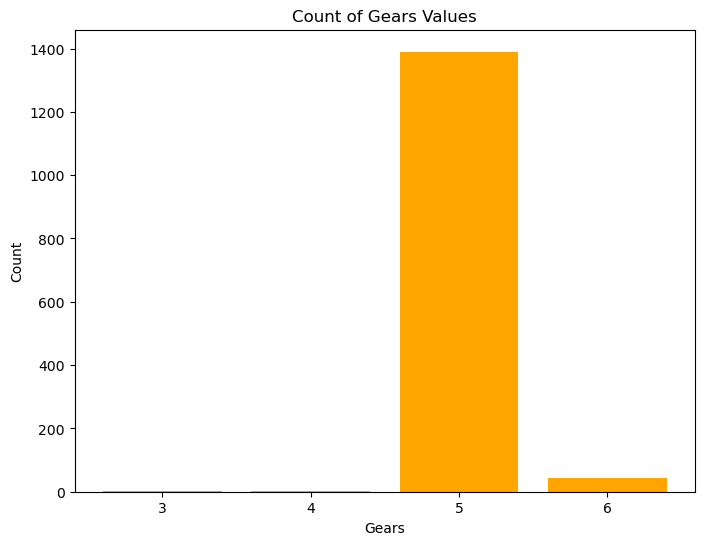

In [34]:
plt.figure(figsize=(8, 6))
plt.bar(data['Gears'].value_counts().index, data['Gears'].value_counts().values, color='orange')
plt.xlabel('Gears')
plt.ylabel('Count')
plt.title('Count of Gears Values')
plt.xticks(ticks=data['Gears'].value_counts().index) 
plt.show()

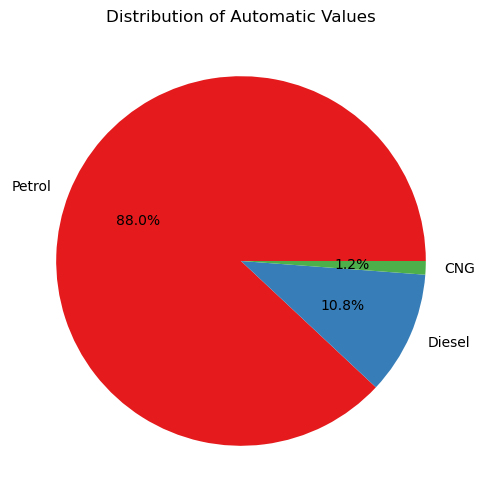

In [35]:
plt.figure(figsize=(8, 6))
plt.pie(data['Fuel_Type'].value_counts(), labels=data['Fuel_Type'].value_counts().index, autopct='%1.1f%%', colors=plt.get_cmap('Set1').colors)
plt.title('Distribution of Automatic Values')
plt.show()

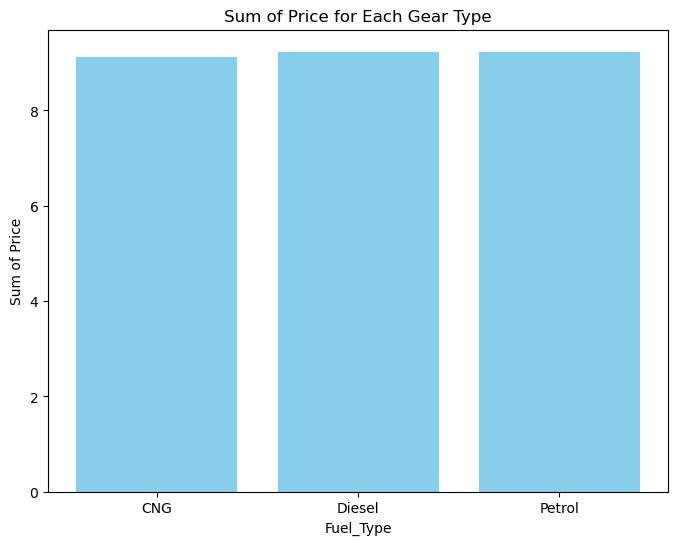

In [36]:
# Group by 'Gears' and calculate the sum of 'Price'
sum_price_by_gears = data.groupby('Fuel_Type')['Price'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(sum_price_by_gears['Fuel_Type'], sum_price_by_gears['Price'], color='skyblue')
plt.xlabel('Fuel_Type')
plt.ylabel('Sum of Price')
plt.title('Sum of Price for Each Gear Type')
plt.xticks(ticks=sum_price_by_gears['Fuel_Type'])
plt.show()

<Axes: xlabel='Price', ylabel='Weight'>

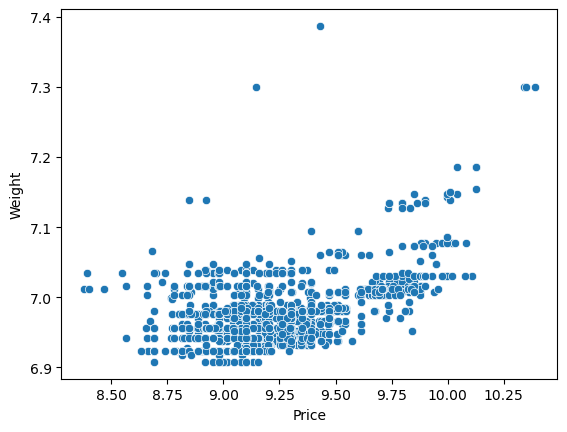

In [37]:
sns.scatterplot(x=data['Price'],y=data['Weight'])

In [38]:
data = data[data['Price'] <=30000 ]

In [39]:
data = data[data['Weight'] <= 7.25]

In [40]:
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [41]:
def linear_model(X_train,y_train):
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model


The linear_model function creates and trains a Linear Regression model. It takes X_train (features) and y_train (target) as inputs, fits the model on the training data, and returns the trained model.

In [42]:
data['Fuel_Type'] = encoder.fit_transform(data['Fuel_Type'])

In [43]:
data.head(3)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,9.510445,529,216.762543,1,90,0,2000,3,5,7.060476
1,9.528794,529,270.068510,1,90,0,2000,3,5,7.060476
2,9.543235,576,204.232710,1,90,0,2000,3,5,7.060476


# Linear Model

In [44]:
X = data.drop(columns='Price')
y = data['Price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = linear_model(X_train,y_train)
y_pred = model.predict(X_test)

In [48]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [-0.56459853 -0.42761188  0.16385732  0.21838795  0.00375678 -0.12030527
 -0.01845399  0.13281368  0.77294977]
Intercept: 9.327640685193948


Coefficients values represent the weight of each feature in the linear regression model.

In [49]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')

Mean Squared Error (MSE): 0.012058793139802227
Root Mean Squared Error (RMSE): 0.1098125363508294
Mean Absolute Error (MAE): 0.0830002576593975
R-squared (R^2): 0.8559487896765491


Mean Squared Error (MSE): 0.0121

Indicates the average squared difference between the predicted and actual values. Lower values represent better performance.

Root Mean Squared Error (RMSE): 0.1098

The square root of MSE, providing error magnitude in the same units as the target variable. Lower values indicate better fit.

Mean Absolute Error (MAE): 0.0830

Measures the average absolute differences between predicted and actual values. Lower values indicate better accuracy.

R-squared (R²): 0.8560

Represents the proportion of variance in the target variable explained by the model. Values close to 1 indicate a good fit.

In [50]:
data.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

In [51]:
data.drop(columns=['Automatic', 'Doors', 'Gears'],inplace=True)

In [52]:
X = data.drop(columns='Price')
y = data['Price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = linear_model(X_train,y_train)
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')

Mean Squared Error (MSE): 0.012157885353479723
Root Mean Squared Error (RMSE): 0.11026280131340634
Mean Absolute Error (MAE): 0.0840022174040133
R-squared (R^2): 0.8547650598332401


# L1 Model 

In [57]:
# Create Lasso model instance with a chosen alpha (regularization strength)
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha as needed

# Fit the Lasso model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}')
print(f'Lasso Regression - RMSE: {rmse_lasso}')
print(f'Lasso Regression - MAE: {mae_lasso}')
print(f'Lasso Regression - R-squared: {r2_lasso}')


Lasso Regression - MSE: 0.08418653067154921
Lasso Regression - RMSE: 0.29014915245705825
Lasso Regression - MAE: 0.2296853605653827
Lasso Regression - R-squared: -0.005670426183949306


# L2 Model

In [58]:
# Create Ridge model instance with a chosen alpha (regularization strength)
ridge_model = Ridge(alpha=0.1)  # You can adjust alpha as needed

# Fit the Ridge model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - MSE: {mse_ridge}')
print(f'Ridge Regression - RMSE: {rmse_ridge}')
print(f'Ridge Regression - MAE: {mae_ridge}')
print(f'Ridge Regression - R-squared: {r2_ridge}')


Ridge Regression - MSE: 0.012161301865421944
Ridge Regression - RMSE: 0.11027829281151365
Ridge Regression - MAE: 0.08405733893226847
Ridge Regression - R-squared: 0.854724247069089


# What is Normalization & Standardization and how is it helpful?

**Normalization** and **Standardization** are two common techniques used to transform data into a format that can be efficiently used by machine learning algorithms.

### 1. **Normalization**:
Normalization refers to rescaling the data to a specific range, usually [0, 1] or [-1, 1]. This ensures that the data does not have any extreme variations, and all features are on the same scale.

**Use Case**:
Normalization is useful when you know that the distribution of the data does not follow a Gaussian distribution and you're using algorithms like K-Nearest Neighbors (KNN) or Neural Networks, which are sensitive to feature scaling.

### 2. **Standardization**:
Standardization involves rescaling the data so that it has a mean of 0 and a standard deviation of 1. It is especially useful when the data follows a Gaussian (normal) distribution.

**Use Case**:
Standardization is often used in algorithms like Support Vector Machines (SVM) or Principal Component Analysis (PCA) that assume a Gaussian distribution or require data to have a similar spread.

### **How It Helps**:
- **Improves Model Accuracy**: It ensures that features with large ranges don’t dominate the model, leading to better and more balanced results.
- **Speeds Up Convergence**: In gradient-based algorithms (e.g., Gradient Descent), scaled data helps the model converge faster by avoiding large step sizes.
- **Reduces Bias**: It eliminates bias in favor of certain features that might have larger numerical values but are not necessarily more important.

# What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs in multiple linear regression when two or more predictor variables are highly correlated, leading to unreliable estimates of regression coefficients and making it difficult to determine the effect of each predictor. Here are several techniques to address multicollinearity:

### 1. **Remove One of the Correlated Variables**:
   - If two or more variables are highly correlated, you can remove one of them from the model. This reduces redundancy and improves model interpretability.

### 2. **Use Principal Component Analysis (PCA)**:
   - PCA reduces the dimensionality of the dataset by transforming the correlated variables into a set of uncorrelated components. These components are then used as predictors instead of the original variables.
   - PCA captures the most important variance in the data, addressing multicollinearity effectively.

### 3. **Use Ridge Regression (L2 Regularization)**:
   - Ridge regression adds a penalty term to the regression model, shrinking the coefficients of correlated variables. This reduces the impact of multicollinearity without removing any variables.
   - The penalty term is proportional to the sum of the squares of the coefficients.

### 4. **Use Lasso Regression (L1 Regularization)**:
   - Lasso regression introduces a penalty that can shrink some coefficients to zero, effectively performing variable selection. This helps remove the least important correlated variables and reduces multicollinearity.

### 5. **Variance Inflation Factor (VIF) Analysis**:
   - VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. If a variable has a high VIF (commonly >10), it indicates high multicollinearity. You can remove or transform variables with high VIF values to reduce multicollinearity.

### 6. **Combine Correlated Variables**:
   - You can create a new variable by combining highly correlated variables (e.g., averaging them or creating an index). This reduces multicollinearity while retaining useful information.

### 7. **Centering the Data**:
   - Subtracting the mean from the predictor variables (i.e., mean centering) can reduce multicollinearity in some cases, especially when the issue arises from polynomial terms or interaction effects.

### 8. **Partial Least Squares (PLS) Regression**:
   - PLS regression combines features of principal component analysis and linear regression, identifying new components that both maximize variance and explain the outcome variable. This approach handles multicollinearity by focusing on the most relevant directions in the data.

By applying one or more of these techniques, you can mitigate multicollinearity and improve the reliability and interpretability of your regression model.